In [1]:
import numpy as np

def load_data(header):
    X = np.loadtxt(header+'_X.csv')
    Y = np.loadtxt(header+'_Y.csv')
    return X, Y

data3 = load_data('../assets/resources/logistic_data3')
data4 = load_data('../assets/resources/logistic_data4')

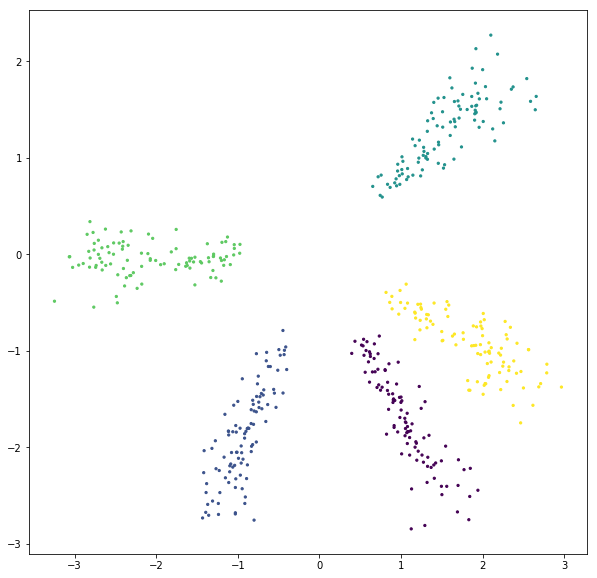

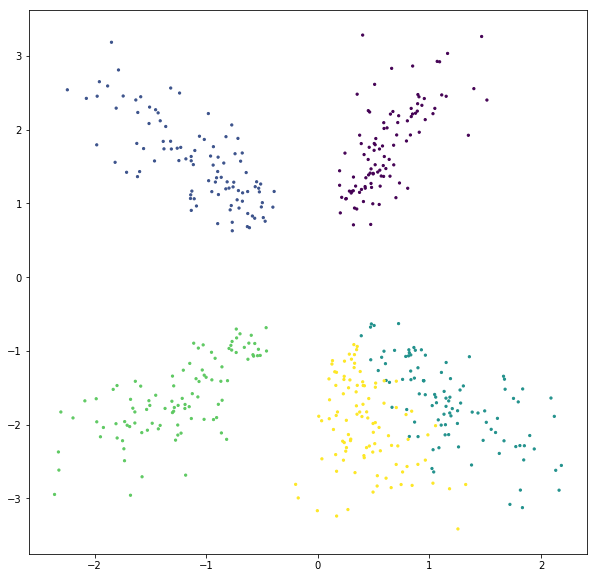

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

def show_data(X, Y, class_vector=None, show=True):
    fig = plt.figure(figsize=(10,10))
    plt.scatter(X[:,0], X[:,1], s=5, c=Y)
    
    if class_vector is not None:
        num_class = np.unique(Y).shape[0]
        color = np.asarray(list(range(num_class)))
        plt.scatter(
            class_vector[:,0],
            class_vector[:,1],
            s=100,
            c=color,
            marker='*'
        )

    if show:
        plt.show()    
    return fig

fig3 = show_data(data3[0], data3[1])
fig4 = show_data(data4[0], data4[1])

## multi class classification

In [3]:
from sklearn.linear_model import LogisticRegression

def class_vectors_from_multiclass_classification(X, Y):
    logistic = LogisticRegression()
    logistic.fit(X, Y)
    return logistic.coef_

def class_vectors_from_one_vs_others_classification(X, Y):
    coefs = []
    unique_labels = np.unique(Y)    
    for label in unique_labels:
        Y_ = Y.copy()
        Y_[np.where(Y == label)[0]] = 1
        Y_[np.where(Y != label)[0]] = -1
        logistic = LogisticRegression(multi_class='multinomial', solver='lbfgs')
        logistic.fit(X, Y_)
        coefs.append(logistic.coef_[0])
    coefs = np.asarray(coefs)
    return coefs

coef3_mc = class_vectors_from_multiclass_classification(data3[0], data3[1])
coef4_mc = class_vectors_from_multiclass_classification(data4[0], data4[1])
coef3_1vso = class_vectors_from_one_vs_others_classification(data3[0], data3[1])
coef4_1vso = class_vectors_from_one_vs_others_classification(data4[0], data4[1])

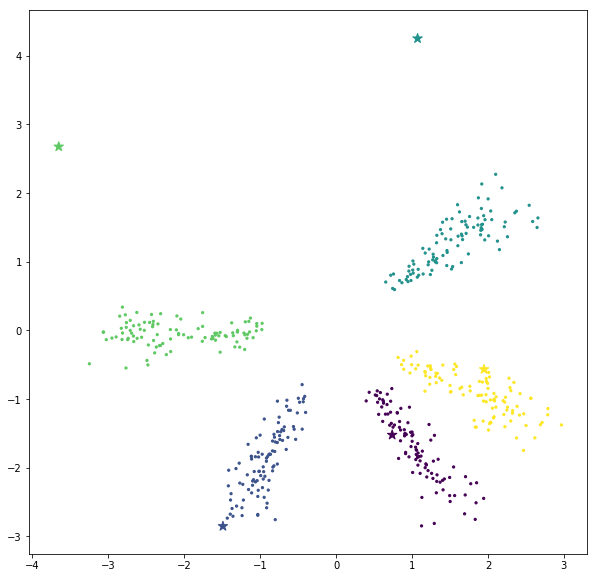

In [4]:
fig3_mc = show_data(data3[0], data3[1], coef3_mc)

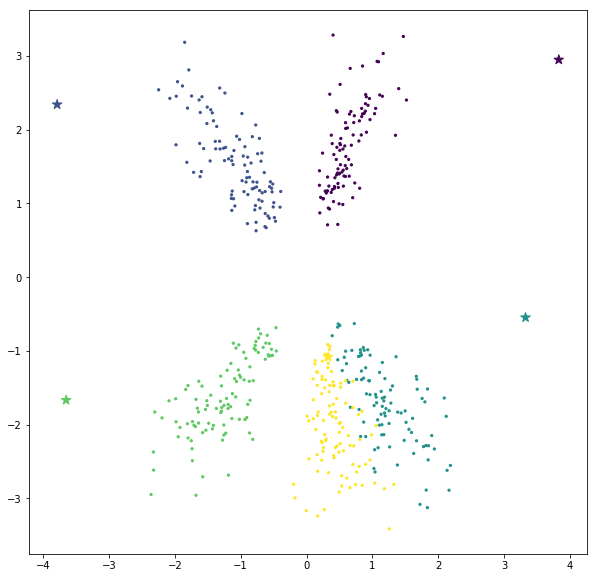

In [5]:
fig4_mc = show_data(data4[0], data4[1], coef4_mc)

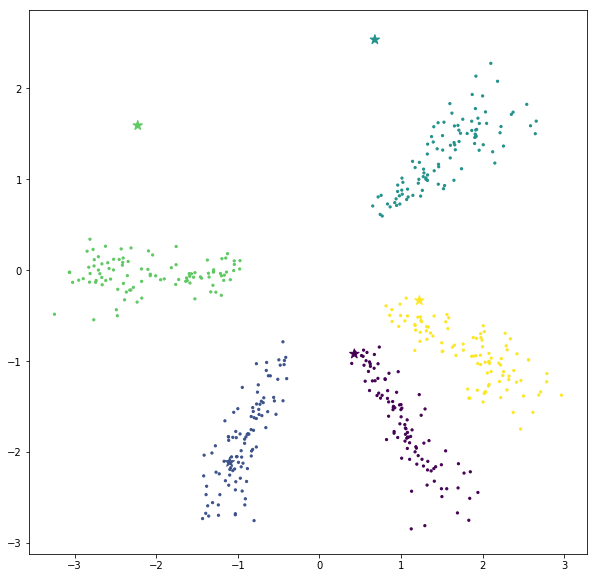

In [6]:
fig3_1vso = show_data(data3[0], data3[1], coef3_1vso)

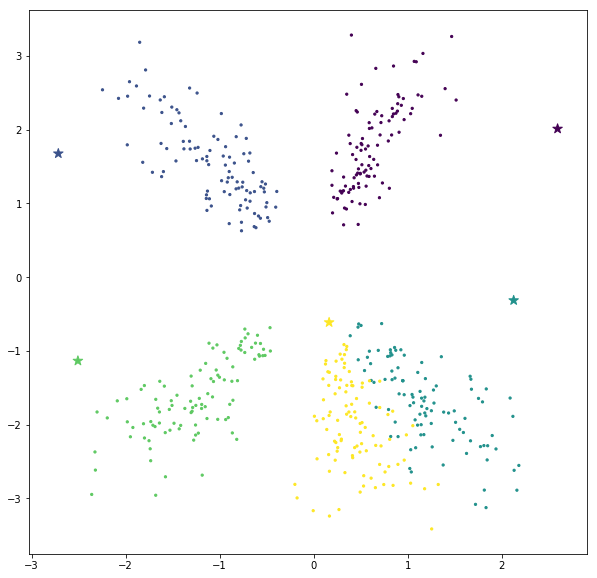

In [7]:
fig4_1vso = show_data(data4[0], data4[1], coef4_1vso)

In [10]:
from sklearn.preprocessing import normalize
print(normalize(coef4_mc))

print(coef4_mc)

[[ 0.79218446  0.61028172]
 [-0.85048455  0.52600003]
 [ 0.98673941 -0.16231244]
 [-0.90959659 -0.41549254]
 [ 0.28962211 -0.95714107]]
[[ 3.82821543  2.9491741 ]
 [-3.78603778  2.34155457]
 [ 3.32376398 -0.54673832]
 [-3.64917288 -1.66689732]
 [ 0.32754269 -1.08246074]]


In [11]:
print(normalize(coef4_1vso))

print(coef4_1vso)

[[ 0.79017031  0.61288733]
 [-0.85078902  0.52550742]
 [ 0.98925194 -0.14622108]
 [-0.91102302 -0.41235549]
 [ 0.25988934 -0.96563841]]
[[ 2.59485412  2.01267142]
 [-2.71487114  1.67689628]
 [ 2.12783185 -0.31451429]
 [-2.50657897 -1.13455046]
 [ 0.16507537 -0.61334994]]


In [12]:
fig3_mc.savefig('logistic_multiclass_data3_mc.png')
fig3_1vso.savefig('logistic_multiclass_data3_1vso.png')
fig4_mc.savefig('logistic_multiclass_data4_mc.png')
fig4_1vso.savefig('logistic_multiclass_data4_1vso.png')